In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("heart-disease.csv")

# Assuming your DataFrame is named df
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models with pipelines
models = {
    'RandomForestClassifier': make_pipeline(RandomForestClassifier()),
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='lbfgs')),  # Ensure solver matches grid
    'KNeighborsClassifier': make_pipeline(StandardScaler(), KNeighborsClassifier())
}


# Fit the models and score them
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy:.4f}')

RandomForestClassifier Accuracy: 0.8022
LogisticRegression Accuracy: 0.8132
KNeighborsClassifier Accuracy: 0.8681


In [15]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform

# Define parameter distributions for RandomizedSearchCV
param_grids = {
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': [50, 100, 200, 300],
        'randomforestclassifier__max_depth': [None, 10, 20, 30, 40],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8]
    },
    'LogisticRegression': {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__penalty': ['l2'],
        'logisticregression__solver': ['lbfgs', 'liblinear', 'saga']
    },
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__p': [1, 2]
    }
}

param_distributions = {
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': randint(50, 300),
        'randomforestclassifier__max_depth': [None, 10, 20, 30, 40],
        'randomforestclassifier__min_samples_split': randint(2, 10),
        'randomforestclassifier__min_samples_leaf': randint(1, 10)
    },
    'LogisticRegression': {
        'logisticregression__C': uniform(0.001, 100),
        'logisticregression__penalty': ['l2'],
        'logisticregression__solver': ['lbfgs', 'liblinear', 'saga']
    },
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': randint(3, 15),
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__p': [1, 2]
    }
}

# Define models with pipelines
models = {
    'RandomForestClassifier': make_pipeline(RandomForestClassifier()),
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000)),
    'KNeighborsClassifier': make_pipeline(StandardScaler(), KNeighborsClassifier())
}

# Perform GridSearchCV or RandomizedSearchCV for each model
for name, model in models.items():
    if name == 'LogisticRegression':
        param_dist = param_distributions[name]
        search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
    else:
        param_dist = param_grids[name]
        search = GridSearchCV(estimator=model, param_grid=param_dist, cv=5, scoring='accuracy')

    search.fit(X_train, y_train)
    best_params = search.best_params_
    best_score = search.best_score_
    print(f'{name} Best Parameters: {best_params}')
    print(f'{name} Best Cross-Validation Score: {best_score:.4f}')


RandomForestClassifier Best Parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}
RandomForestClassifier Best Cross-Validation Score: 0.8534
LogisticRegression Best Parameters: {'logisticregression__C': 2.0594494295802446, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
LogisticRegression Best Cross-Validation Score: 0.8111
KNeighborsClassifier Best Parameters: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
KNeighborsClassifier Best Cross-Validation Score: 0.8346


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



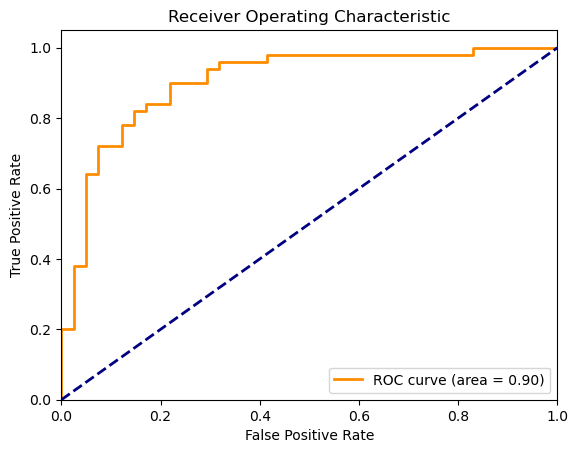

Confusion Matrix:
 [[32  9]
 [ 8 42]]


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , classification_report ,confusion_matrix

# Define the best model based on the previous step (for illustration, assuming RandomForestClassifier was the best)
best_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)  # replace with actual best params
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))